# Cache Design

### Direct Mapping

(MODIFIED FROM: Krerk P.)

In [2]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 62.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 81.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 16.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you ma

In [3]:
import os
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
block_size = [4, 8, 16, 32]
cache_size = [4, 8, 16, 32]

In [5]:
with open("CacheSim_template.h", "r") as f:
  template = f.readlines()
template = [line.strip() for line in template]

$\mathrm{cache\_size} = \mathrm{index\_size} \times \mathrm{block\_size}$  
$\mathrm{index\_len} = \log_2(\mathrm{index\_size})$  
$\mathrm{offset\_len} = \log_2(\mathrm{block\_size})$

In [6]:
def my_log(x):
  return int(x).bit_length() - 1

In [8]:
def try_run(template, block_sz, cache_sz):
  cache_sz_1024 = cache_sz * 1024
  index_sz = cache_sz_1024 // block_sz
  index_len = my_log(index_sz)
  offset_len = my_log(block_sz)
  with open("CacheSim.h", "w") as f:
    for line in template:
      if line.startswith("#define BLOCK_SIZE"):
        f.write(f"#define BLOCK_SIZE {block_sz}\n")
      elif line.startswith("#define CACHE_SIZE"):
        f.write(f"#define CACHE_SIZE {cache_sz_1024}\n")
      elif line.startswith("#define INDEX_SIZE"):
        f.write(f"#define INDEX_SIZE {index_sz}\n")
      elif line.startswith("#define INDEXLEN"):
        f.write(f"#define INDEXLEN {index_len}\n")
      elif line.startswith("#define OFFSETLEN"):
        f.write(f"#define OFFSETLEN {offset_len}\n")
      else:
        f.write(line + "\n")
  
  os.system("gcc -o CacheSim CacheSim.c 2> warnings.txt")
  os.system("./CacheSim gcc_ld_trace.txt > result.txt")
  os.system("rm CacheSim")
  os.system("rm warnings.txt")
  
  with open("result.txt", "r") as f:
    result = f.readlines()
  result = [line.strip() for line in result]
  real_result = result[3]
  hit = real_result.split()[1]
  miss = real_result.split()[3]
  miss_rate = int(miss) / (int(hit) + int(miss))
  print(f"Block Size: {block_sz}, Cache Size: {cache_sz}, Hit: {hit}, Miss: {miss}, Miss Rate: {miss_rate:.6}")
  return hit, miss, miss_rate

In [10]:
results = []
for block_sz in block_size:
  results.append([])
  for cache_sz in cache_size:
    hit, miss, miss_rate = try_run(template, block_sz, cache_sz)
    results[-1].append(1 - miss_rate)
    print("--------------------------------------------------")

Block Size: 4, Cache Size: 4, Hit: 1669560, Miss: 330441, Miss Rate: 0.16522
--------------------------------------------------
Block Size: 4, Cache Size: 8, Hit: 1775198, Miss: 224803, Miss Rate: 0.112401
--------------------------------------------------
Block Size: 4, Cache Size: 16, Hit: 1849934, Miss: 150067, Miss Rate: 0.0750335
--------------------------------------------------
Block Size: 4, Cache Size: 32, Hit: 1895088, Miss: 104913, Miss Rate: 0.0524565
--------------------------------------------------
Block Size: 8, Cache Size: 4, Hit: 1652147, Miss: 347854, Miss Rate: 0.173927
--------------------------------------------------
Block Size: 8, Cache Size: 8, Hit: 1766215, Miss: 233786, Miss Rate: 0.116893
--------------------------------------------------
Block Size: 8, Cache Size: 16, Hit: 1846558, Miss: 153443, Miss Rate: 0.0767215
--------------------------------------------------
Block Size: 8, Cache Size: 32, Hit: 1895885, Miss: 104116, Miss Rate: 0.052058
-------------

In [49]:
print(results)

[[0.8347795826102087, 0.8875985562007219, 0.9249665375167313, 0.9475435262282369], [0.8260730869634565, 0.8831070584464707, 0.9232785383607308, 0.947942026028987], [0.8387310806344597, 0.892075053962473, 0.9300800349599825, 0.9533730233134884], [0.8437825781087109, 0.8967150516424742, 0.9337485331257335, 0.9559235220382389]]


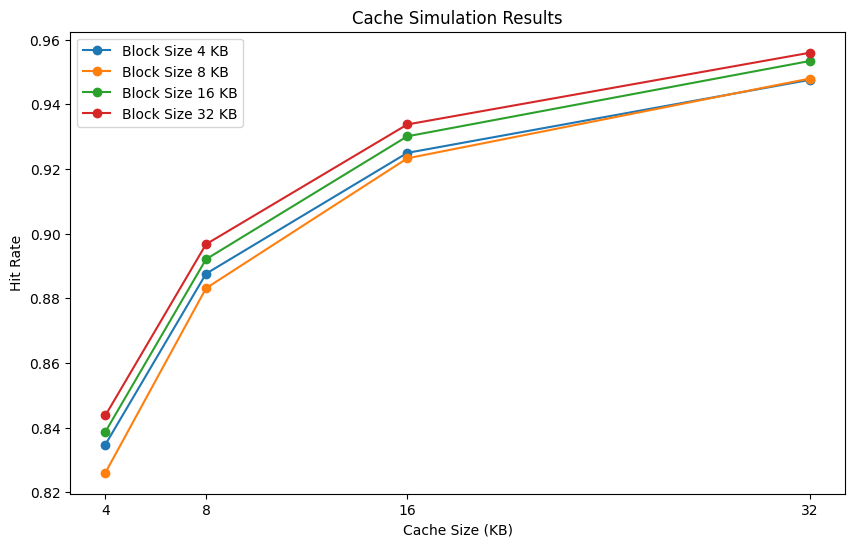

In [58]:
plt.figure(figsize=(10, 6))
plt.title("Cache Simulation Results")
plt.xlabel("Cache Size (KB)")
plt.ylabel("Hit Rate")
for i, block_sz in enumerate(block_size):
  plt.plot(cache_size, results[i], label=f"Block Size {block_sz} KB", marker='o')
plt.xticks(cache_size)
plt.legend()

plt.show()

### Associative Mapping

In this project, there are $2$ algorithms for associative mapping:
- Least Recently Used (LRU)
- Round Robin (RR)

(SOURCE CODE FROM: Nantapong R.)

In [59]:
with open("CacheSimAssociative_template.h", "r") as f:
  template = f.readlines()
template = [line.strip() for line in template]

In [78]:
def try_run_asso(alg, cache_sz, block_sz, assoc):
  os.system(f"./CacheSimAssociative gcc_ld_trace.txt {cache_sz} {block_sz} {assoc} {alg} > result.txt")
  
  with open("result.txt", "r") as f:
    result = f.readlines()
  result = [line.strip() for line in result]
  real_result = result[1]
  hit = real_result.split()[1]
  miss = real_result.split()[3]
  miss_rate = int(miss) / (int(hit) + int(miss))
  print(f"Block Size: {block_sz}, Cache Size: {cache_sz}, Hit: {hit}, Miss: {miss}, Miss Rate: {miss_rate:.6}")
  return hit, miss, miss_rate

In [ ]:
cache_size = [1, 4, 8, 32, 512, 1024]
config = [
  ("LRU", 2),
  ("RR", 2),
  ("LRU", 4),
  ("RR", 4)
]

In [79]:
results = []
os.system("gcc -o CacheSimAssociative CacheSimAssociative.c 2> warnings.txt")
for alg, assoc in config:
  results.append([])
  for cache_sz in cache_size:
    hit, miss, miss_rate = try_run_asso(alg, cache_sz * 1024, 4, assoc)
    results[-1].append(1 - miss_rate)
    print("--------------------------------------------------")
os.system("rm CacheSimAssociative")

Block Size: 4, Cache Size: 1024, Hit: 1491704, Miss: 508297, Miss Rate: 0.254148
--------------------------------------------------
Block Size: 4, Cache Size: 4096, Hit: 1759588, Miss: 240413, Miss Rate: 0.120206
--------------------------------------------------
Block Size: 4, Cache Size: 8192, Hit: 1834446, Miss: 165555, Miss Rate: 0.0827775
--------------------------------------------------
Block Size: 4, Cache Size: 32768, Hit: 1939563, Miss: 60438, Miss Rate: 0.030219
--------------------------------------------------
Block Size: 4, Cache Size: 524288, Hit: 1974599, Miss: 25402, Miss Rate: 0.012701
--------------------------------------------------
Block Size: 4, Cache Size: 1048576, Hit: 1974717, Miss: 25284, Miss Rate: 0.012642
--------------------------------------------------
Block Size: 4, Cache Size: 1024, Hit: 1443265, Miss: 556736, Miss Rate: 0.278368
--------------------------------------------------
Block Size: 4, Cache Size: 4096, Hit: 1732248, Miss: 267753, Miss Rate: 

0

In [80]:
print(results)

[[0.7458516270741864, 0.87979356010322, 0.9172225413887293, 0.9697810151094924, 0.9872990063504968, 0.9873580063209968], [0.7216321391839304, 0.8661235669382166, 0.9092420453789773, 0.9661335169332416, 0.9872435063782468, 0.9873440063279968], [0.7638391180804409, 0.8932350533824733, 0.9261330369334815, 0.9752455123772438, 0.9873720063139968, 0.9873760063119968], [0.7261071369464316, 0.8746940626529687, 0.9160335419832291, 0.9695635152182424, 0.9873645063177469, 0.9873760063119968]]


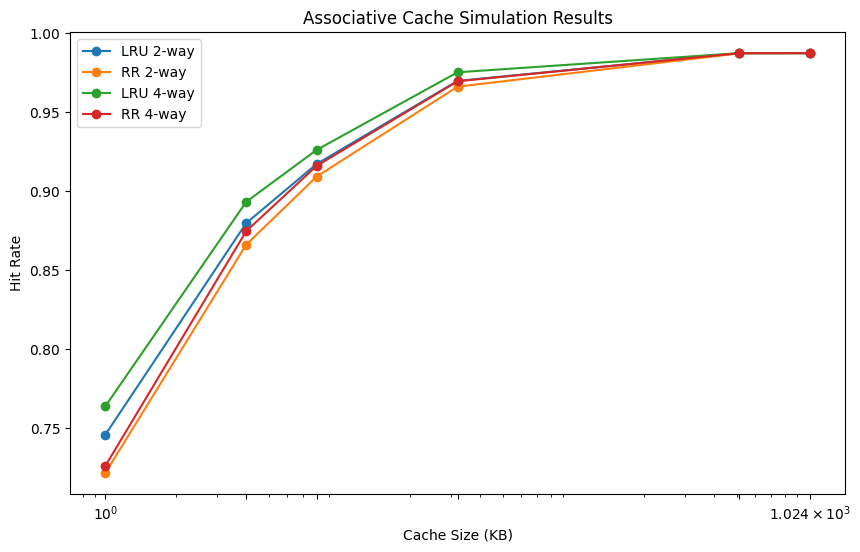

In [81]:
plt.figure(figsize=(10, 6))
plt.title("Associative Cache Simulation Results")
plt.xlabel("Cache Size (KB)")
plt.ylabel("Hit Rate")
plt.xscale("log")
for i, (alg, assoc) in enumerate(config):
  plt.plot(cache_size, results[i], label=f"{alg} {assoc}-way", marker='o')
plt.xticks(cache_size)
plt.legend()

plt.show()